<a href="https://colab.research.google.com/github/nirmal-92/GameGauge/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplsoccer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os

# importing the data parser through mplsoccer (alternative to the official statsbombpy package)
parser  = Sbopen()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.3 MB/s eta 0:00:00


In [3]:
competitions = parser.competition()
competitions[competitions.competition_name=='Indian Super league']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
37,1238,108,India,Indian Super league,male,False,False,2021/2022,2024-02-12T17:41:31.729787,None,None,2024-02-12T17:41:31.729787


In [4]:
parser.match(competition_id =1238,season_id = 108)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3827767,2022-03-20,2022-03-20 16:00:00,1,1,available,unscheduled,2022-04-14 17:33:06.627987,NaT,25,...,74,Championship - Final,1000400,Pandit Jawaharlal Nehru Stadium,105,India,1004906.0,Crystal John,105.0,India
1,3827335,2022-03-15,2022-03-15 16:00:00,1,1,available,unscheduled,2022-05-17 22:00:48.247246,NaT,24,...,158,Play-offs - Semi-Finals,1000401,Tilak Maidan Stadium,105,India,1004863.0,Harish Kundu,105.0,India
2,3827336,2022-03-16,2022-03-16 16:00:00,1,0,available,unscheduled,2022-04-14 17:24:50.569810,NaT,24,...,158,Play-offs - Semi-Finals,5810,GMC Athletic Stadium,105,India,1004922.0,Ramachandran Venkatesh,105.0,India
3,3827338,2022-03-12,2022-03-12 16:00:00,3,1,available,unscheduled,2022-12-01 19:56:17.158053,NaT,23,...,158,Play-offs - Semi-Finals,5810,GMC Athletic Stadium,105,India,1004912.0,Raul Gupta,105.0,India
4,3827337,2022-03-11,2022-03-11 16:00:00,0,1,available,unscheduled,2022-04-14 17:12:45.886818,NaT,23,...,158,Play-offs - Semi-Finals,1000400,Pandit Jawaharlal Nehru Stadium,105,India,1005422.0,Tejas Nagvenkar,105.0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3813272,2021-12-18,2021-12-18 18:00:00,1,1,available,unscheduled,2021-12-21 11:44:07.458965,NaT,7,...,1,Regular Season,5810,GMC Athletic Stadium,105,India,1004922.0,Ramachandran Venkatesh,105.0,India
111,3813268,2021-12-06,2021-12-06 16:00:00,2,1,available,unscheduled,2021-12-21 21:54:41.606196,NaT,4,...,1,Regular Season,5810,GMC Athletic Stadium,105,India,2459.0,Arumughan Rowan,105.0,India
112,3813267,2021-12-07,2021-12-07 16:00:00,3,4,available,unscheduled,2021-12-21 21:59:57.694647,NaT,5,...,1,Regular Season,1000401,Tilak Maidan Stadium,105,India,1004997.0,Coimbatore Ramaswamy Srikrishna,105.0,India
113,3813265,2022-01-07,2022-01-07 16:00:00,0,0,available,unscheduled,2022-02-19 22:00:23.095275,NaT,11,...,1,Regular Season,1000401,Tilak Maidan Stadium,105,India,1004958.0,Senthil Nathan,105.0,India


In [5]:
df, df_related, df_freeze, df_tactics = parser.event(3827767)

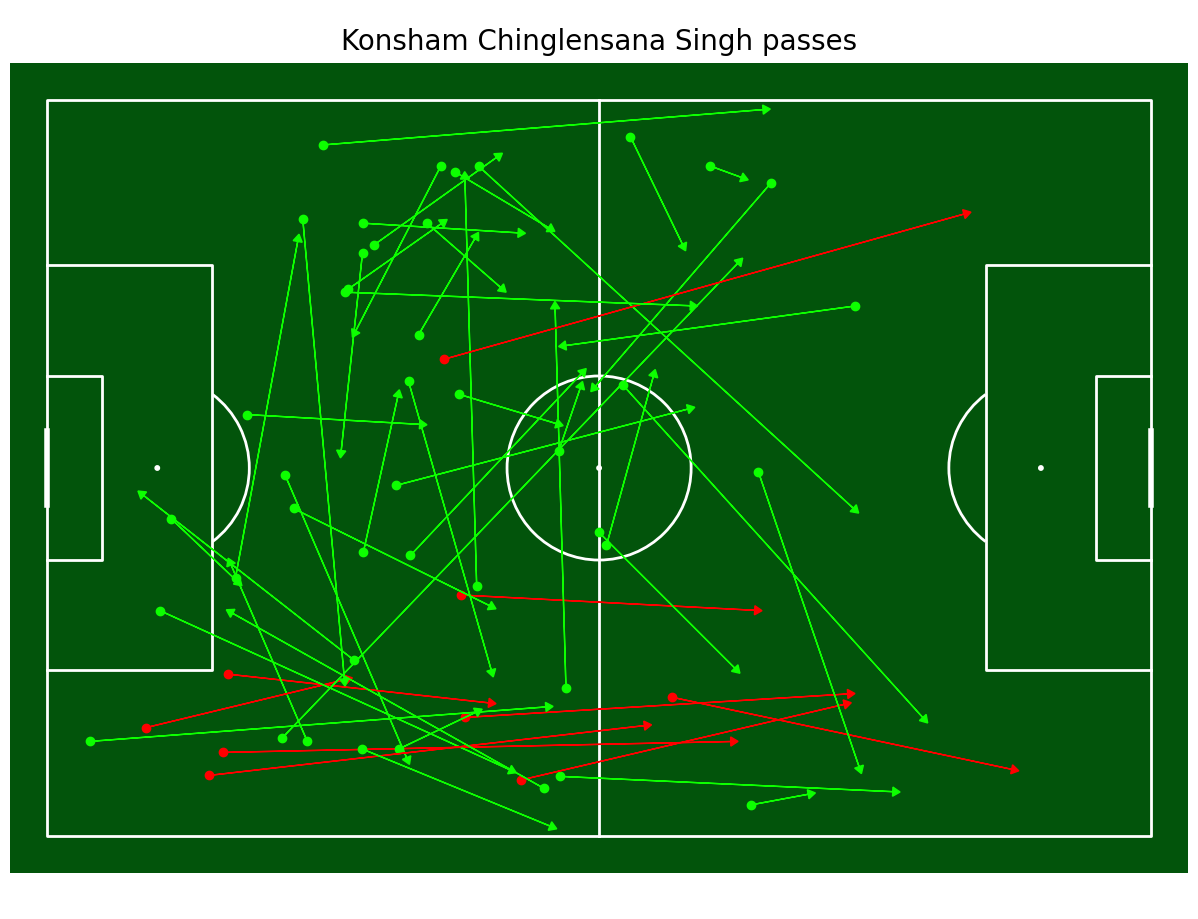

In [6]:
# to take a better look at player pass map
def generatePlayerPassMap(player_name):
    player_filter = (df.type_name == 'Pass') & (df.player_name == player_name)
    player_df = df.loc[player_filter, ['x', 'y', 'end_x', 'end_y']]

    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    for i in player_df.index:
        x = player_df['x'][i]
        y = player_df['y'][i]
        dx = player_df['end_x'][i] - player_df['x'][i]
        dy = player_df['end_y'][i] - player_df['y'][i]
        if df['outcome_name'][i] != 'Incomplete':
            ax['pitch'].arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
            pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax['pitch'])
        else:
            ax['pitch'].arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
            pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax['pitch'])
    fig.suptitle(player_name+" passes", fontsize = 20)



# we can do this for all players individually
generatePlayerPassMap("Konsham Chinglensana Singh")

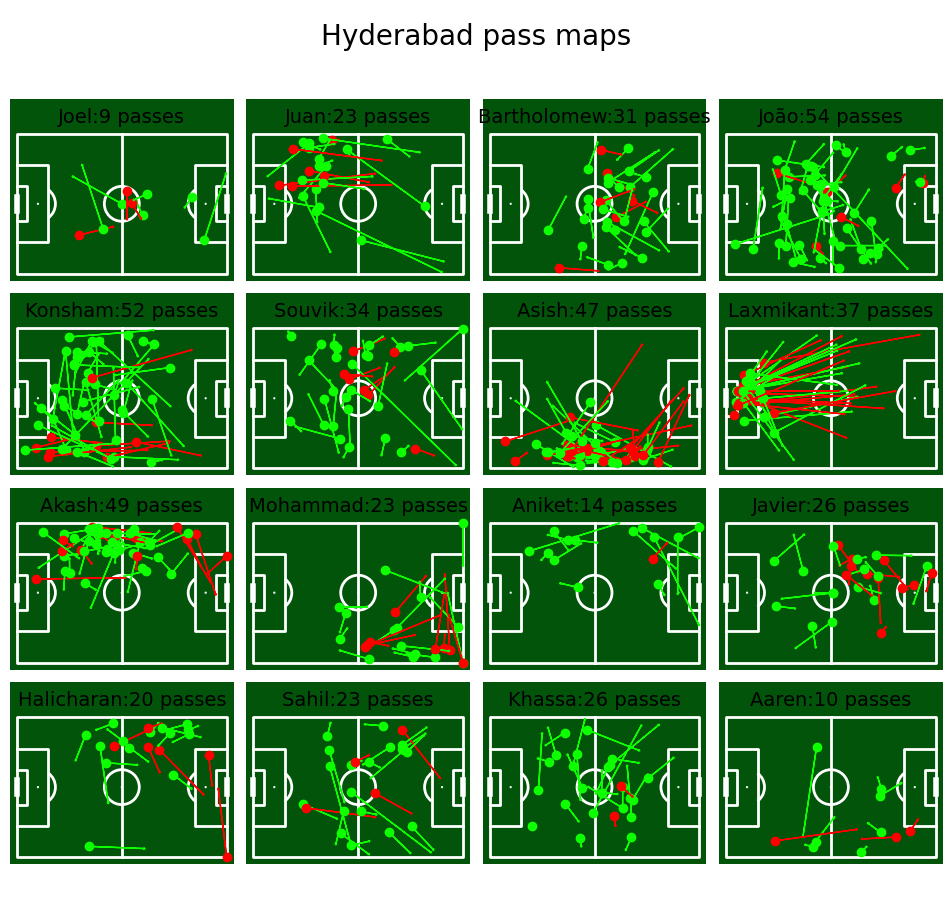

<Figure size 1400x1000 with 0 Axes>

In [9]:
def generatePlayerPassMapsGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b',pad_top=20)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[0]+":"+str(len(player_df))+" passes",ha='center', va='center', fontsize=14)
        #scatter -  plots the player position with 0.2 alpha(visibility)
        #pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
        #plot pass arrows
        #pitch.arrows(player_df.x, player_df.y,player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)
        # plotting arrows one by one, red or green based on if its incomplete or not
        for i in player_df.index:
            x=player_df['x'][i]
            y = player_df['y'][i]
            dx = player_df['end_x'][i] - player_df['x'][i]
            dy = player_df['end_y'][i] - player_df['y'][i]
            if df['outcome_name'][i] != 'Incomplete':
                ax.arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax)
            else:
                ax.arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax)


    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" pass maps", ha='center', va='center', fontsize=20)


# calling the function for both teams
generatePlayerPassMapsGrid('Hyderabad')

/usr/local/lib/python3.10/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


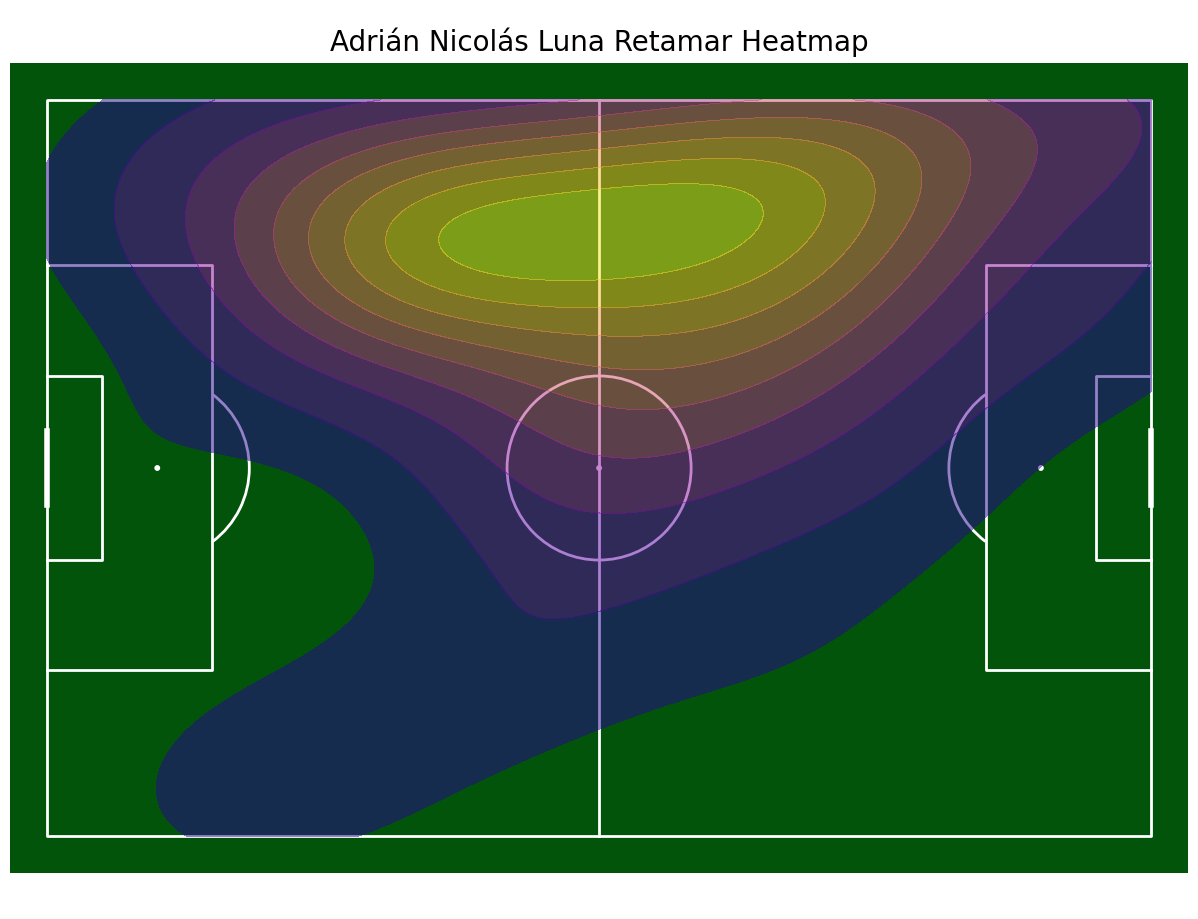

In [10]:
def generatePlayerHeatMap(player_name):
    player_filter = (df.type_name == 'Pass') & (df.player_name == player_name)
    player_df = df.loc[player_filter, ['x', 'y', 'end_x', 'end_y']]

    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax['pitch']
        )
    fig.suptitle(player_name+" Heatmap", fontsize = 20)


# calling the function
# we can do this for all players individually
generatePlayerHeatMap("Adrián Nicolás Luna Retamar")

/usr/local/lib/python3.10/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.10/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.10/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/usr/local/lib/python3.10/dist-packages/mplsoccer/_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in fa

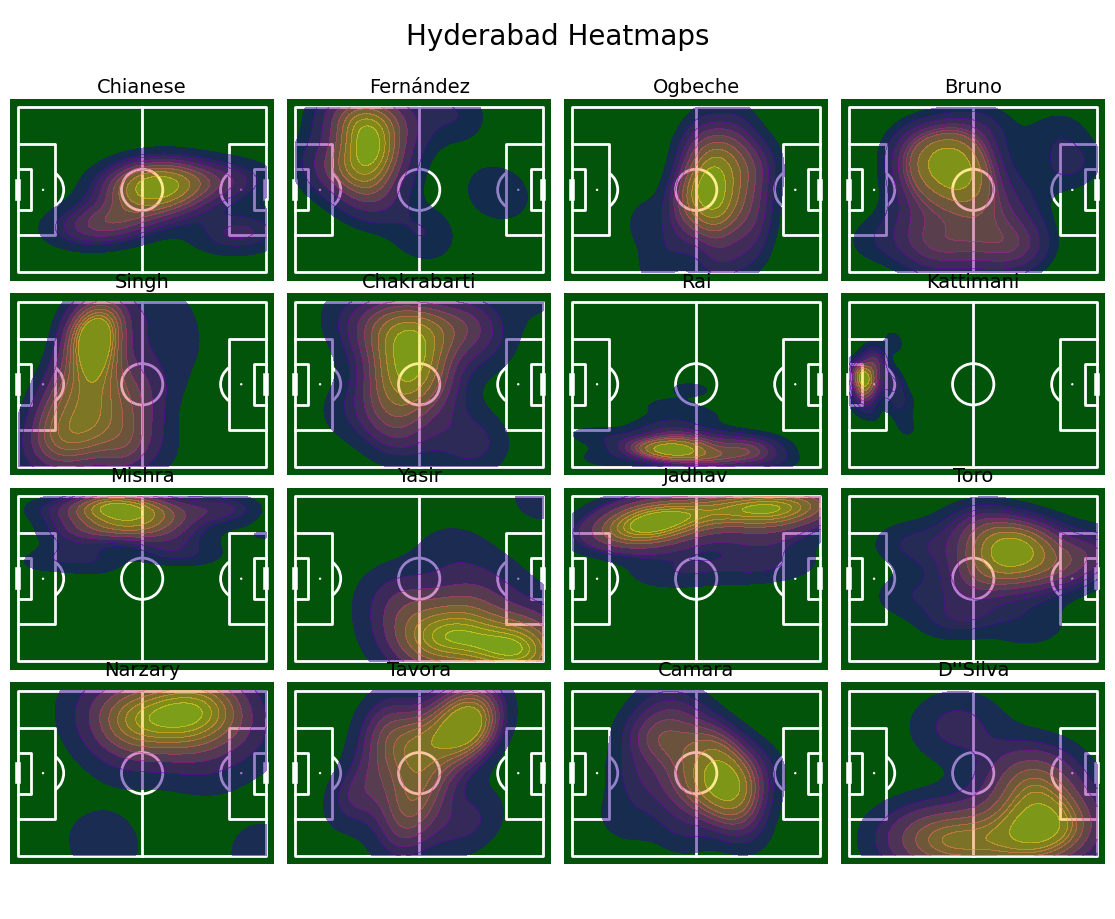

<Figure size 1400x1000 with 0 Axes>

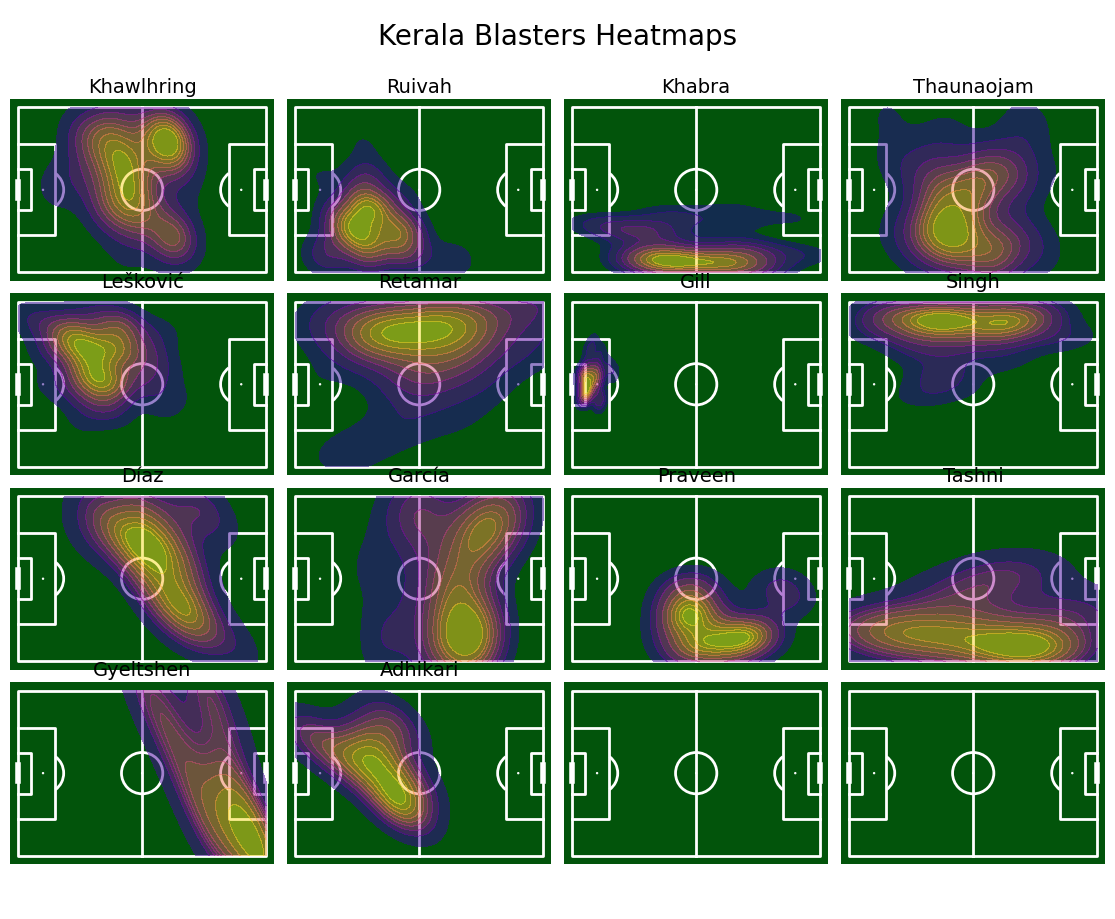

<Figure size 1400x1000 with 0 Axes>

In [11]:
def generatePlayerHeatmapGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[-1],ha='center', va='center', fontsize=14)
        #Create the heatmap
        pitch.kdeplot(
            x=player_df['x'],
            y=player_df['y'],
            shade = True,
            shade_lowest=False,
            alpha=.5,
            n_levels=10,
            cmap = 'plasma',
            ax=ax
        )
    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" Heatmaps", ha='center', va='center', fontsize=20)





generatePlayerHeatmapGrid("Hyderabad")
generatePlayerHeatmapGrid("Kerala Blasters")

<ipython-input-14-8726ba04f1d5>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',ci=None)


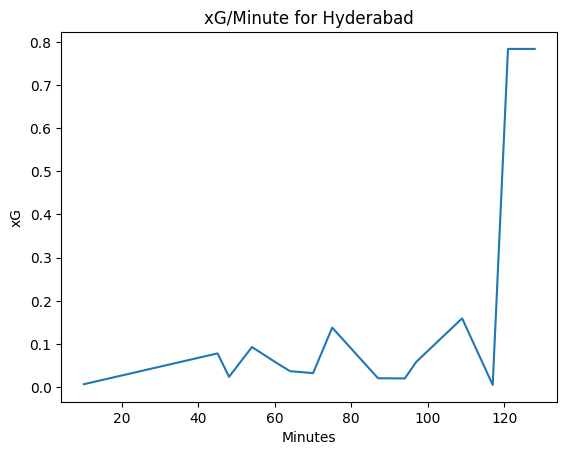

<ipython-input-14-8726ba04f1d5>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',ci=None)


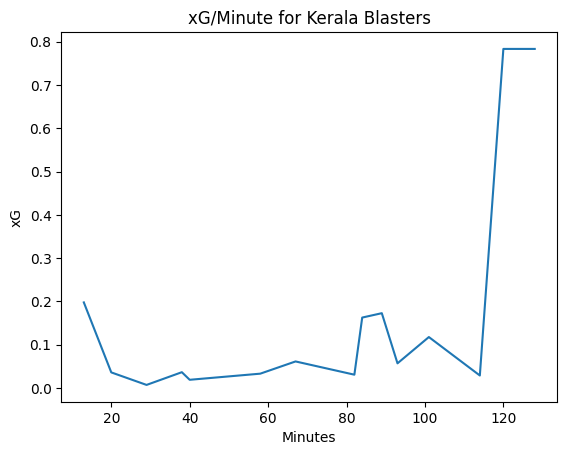

In [14]:
def generateTeamxGDataFrame(team_name):
    xg = df[['team_name','minute','type_name','shot_statsbomb_xg','x','y']]
    team_xg = xg[xg['team_name']==team_name].reset_index()
    return team_xg

def generatexGPlot(team_name):
    team_xg = generateTeamxGDataFrame(team_name)
    #xg_events[xg_events.shot_statsbomb_xg.isna()==False]
    plt.clf()
    sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',ci=None)
    plt.xlabel("Minutes")
    plt.ylabel("xG")
    plt.title("xG/Minute for "+ team_name)
    plt.show()



#calling the functions
generatexGPlot('Hyderabad') # penalty shootout at the end
generatexGPlot('Kerala Blasters')

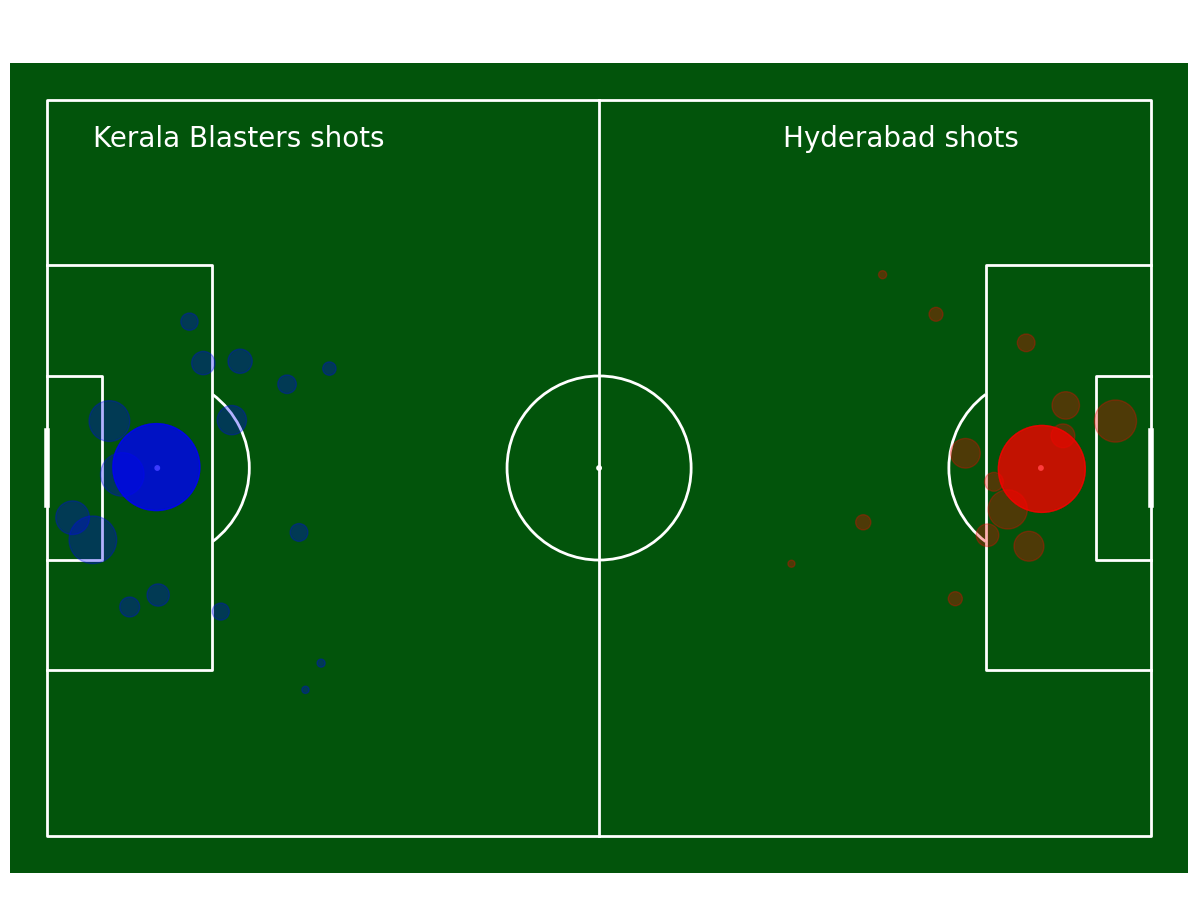

In [17]:
def generateCombinedShotMap(team1,team2):
    team1_xg = generateTeamxGDataFrame(team1)
    team2_xg = generateTeamxGDataFrame(team2)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    team2_shots = team2_xg[team2_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    pitch.scatter(120-team2_shots.x, 80-team2_shots.y, alpha = 0.3, s = team2_shots.shot_statsbomb_xg*5000, color = "blue", ax=ax['pitch'],)
    ax['pitch'].text(5, 5, team2 + ' shots',color='white',size=20)
    ax['pitch'].text(80, 5, team1 + ' shots',color='white',size=20)


# calling the function
generateCombinedShotMap('Hyderabad','Kerala Blasters')

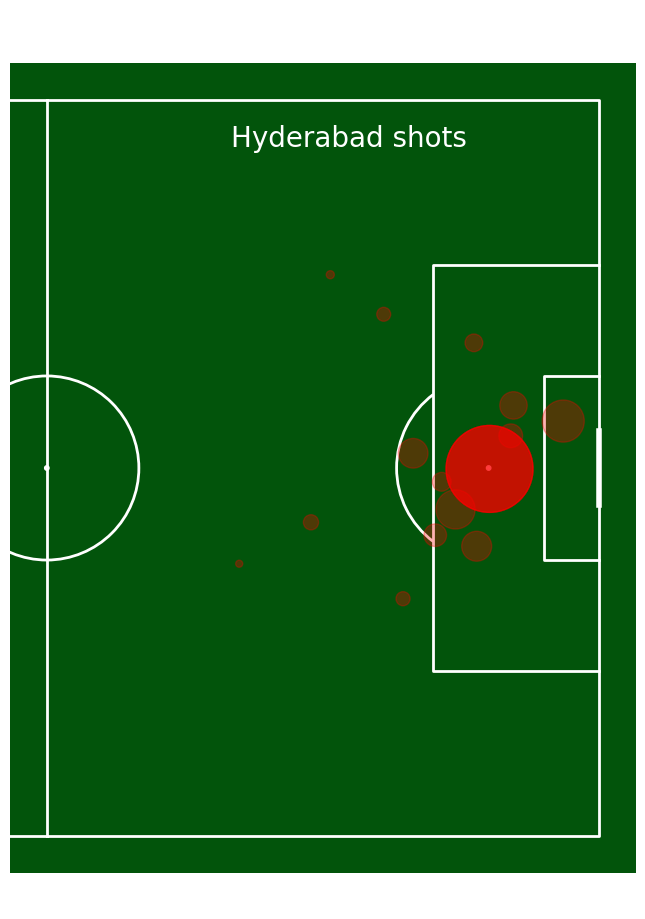

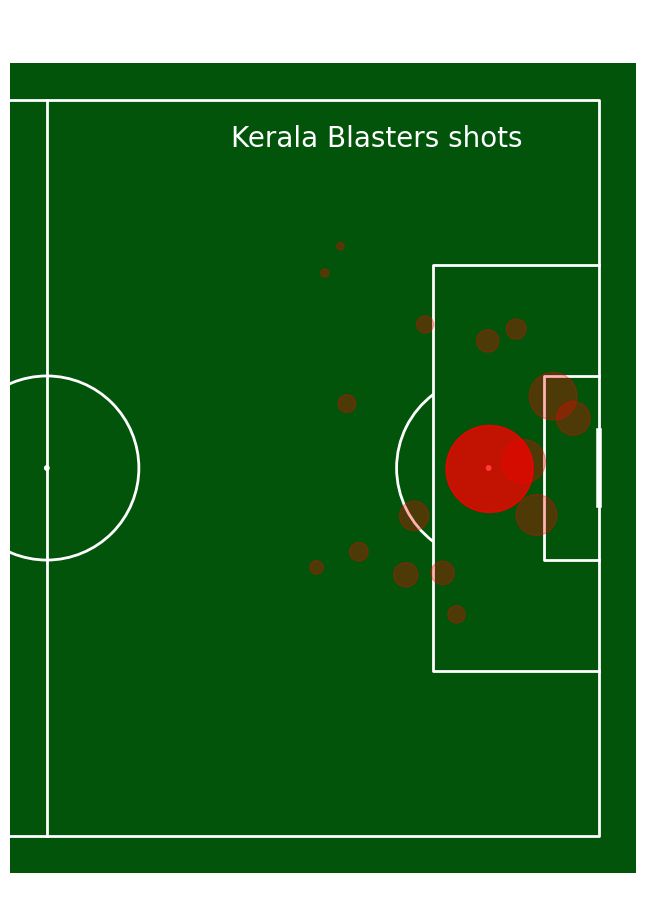

In [18]:
def generateTeamShotMap(team_name):
    team1_xg = generateTeamxGDataFrame(team_name)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b',half=True)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    ax['pitch'].text(80, 5, team_name + ' shots',color='white',size=20)



# calling the functions
generateTeamShotMap('Hyderabad')
generateTeamShotMap('Kerala Blasters')

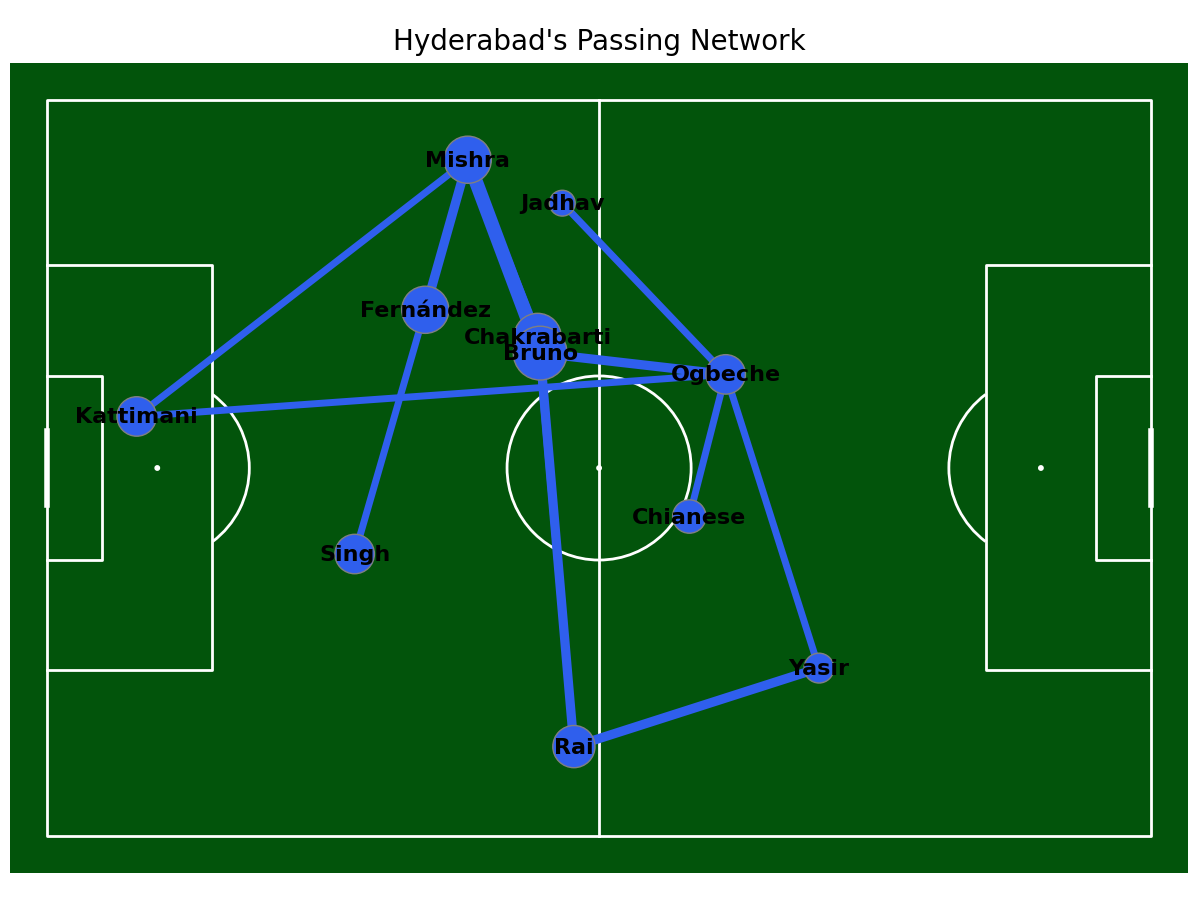

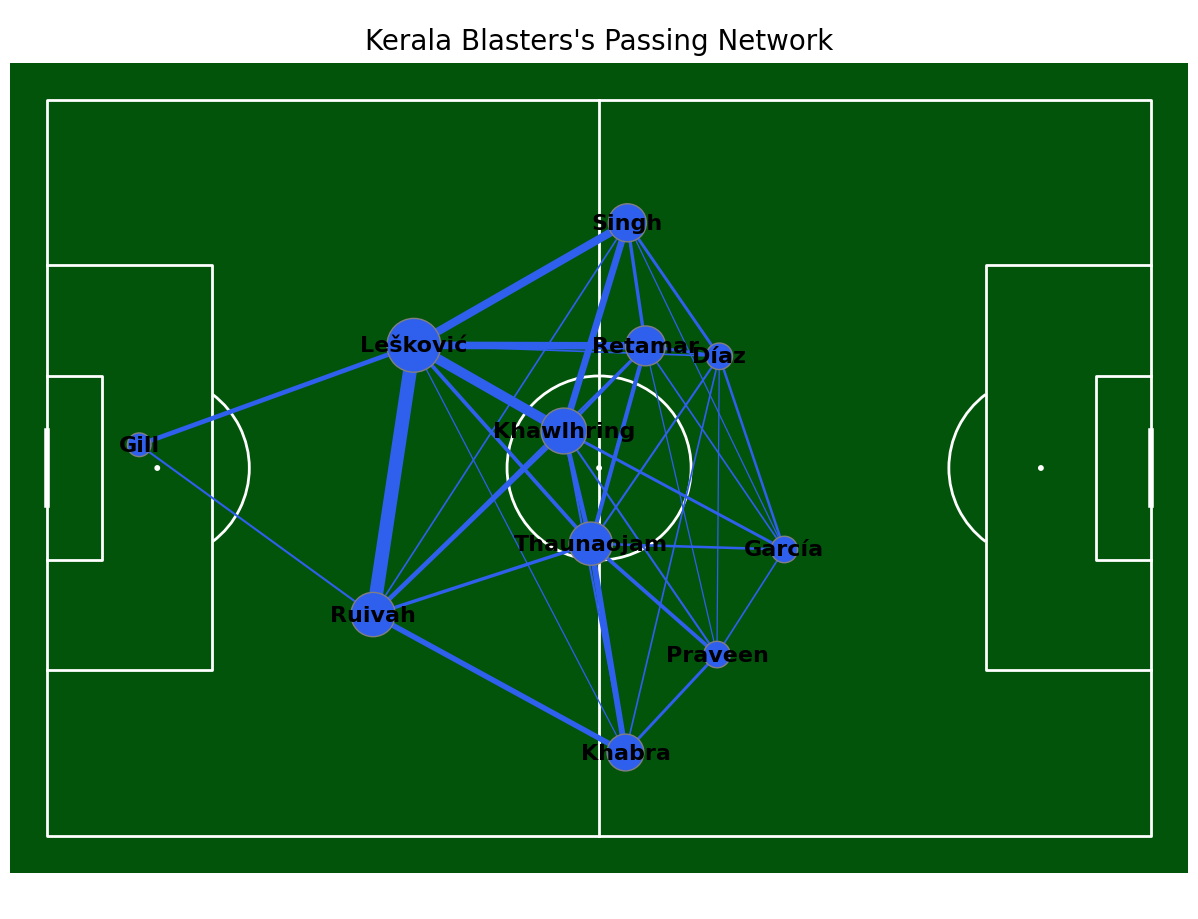

In [19]:
def generatePassingNetwork(team_name):
    #check for index of first sub
    sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == team_name].iloc[0]["index"]
    #make df with successfull passes by Real Madrid until the first substitution
    rm_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    #taking necessary columns
    rm_pass = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    #adjusting that only the surname of a player is presented.
    rm_pass["player_name"] = rm_pass["player_name"].apply(lambda x: str(x).split()[-1])
    rm_pass["pass_recipient_name"] = rm_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

    scatter_df = pd.DataFrame()
    for i, name in enumerate(rm_pass["player_name"].unique()):
        passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
        recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
        recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
    #adjust the size of a circle so that the player who made more passes
    scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

    #counting passes between players
    rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #setting a threshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]

    #plot once again pitch and vertices
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
    fig.suptitle(team_name+"'s Passing Network", fontsize = 20)




# calling the function
generatePassingNetwork("Hyderabad")
generatePassingNetwork("Kerala Blasters")